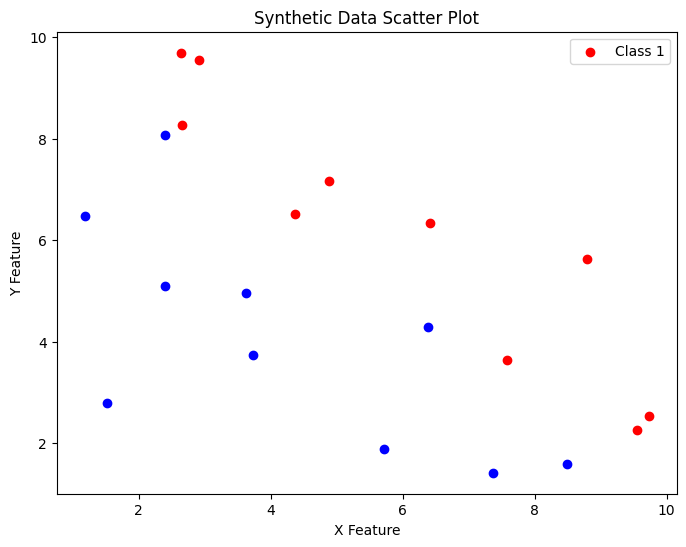

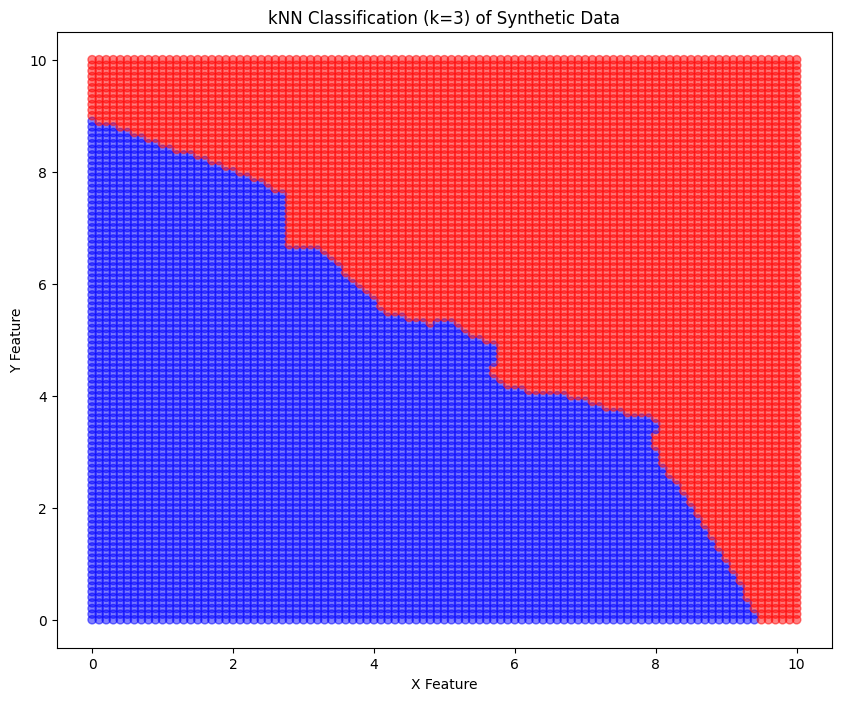

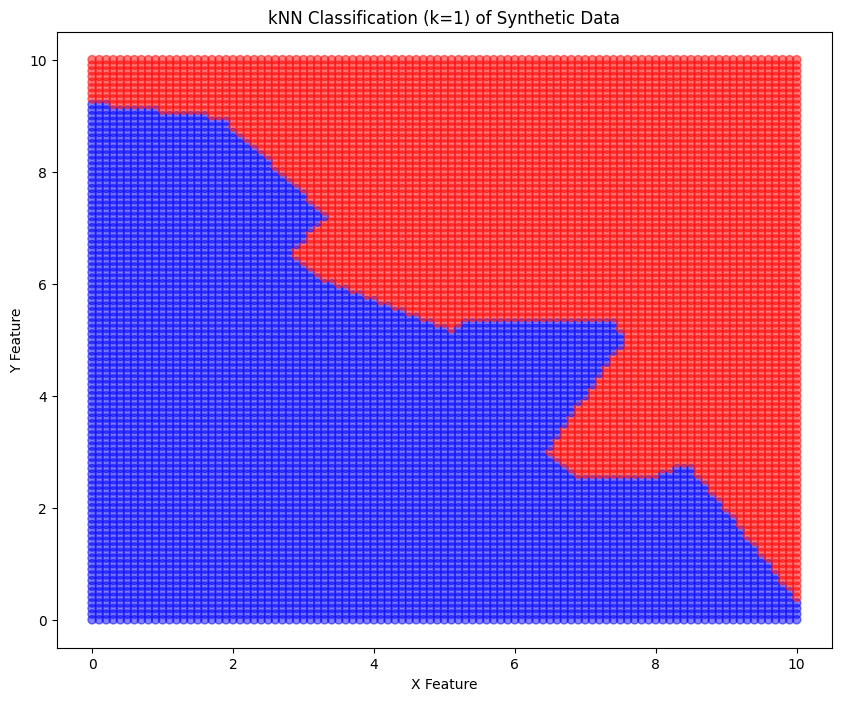

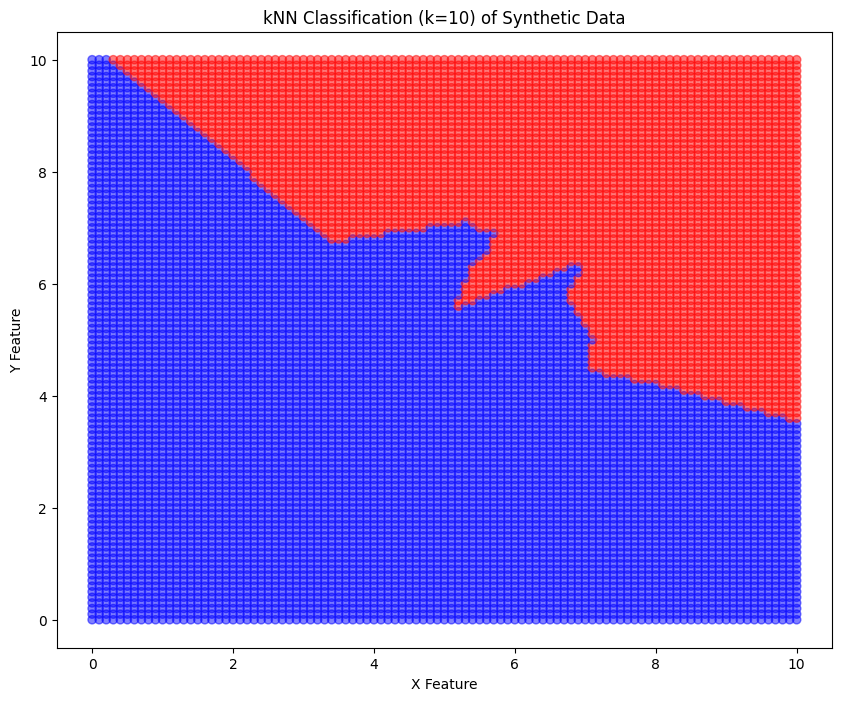

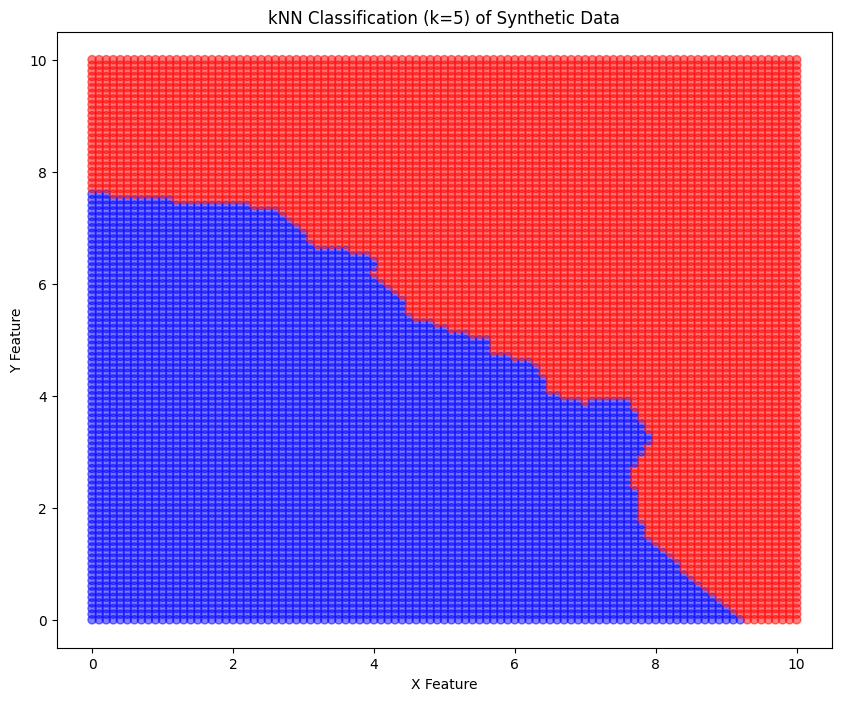

In [1]:
# A5 LAB PRATICE SHEET - 05 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.neighbors import KNeighborsClassifier

# Reading data
data_path = "/Users/krishnavarma/Developer/UG AI MATERIAL /4th SEM COURSE/ML/ML CLG PR.CODES!/A4 ML/simplified_coffee.xlsx"
coffee_data = pd.read_excel("/Users/krishnavarma/Developer/UG AI MATERIAL /4th SEM COURSE/ML/ML CLG PR.CODES!/A4 ML/simplified_coffee.xlsx")

# Splitting data for classification
X_class = coffee_data[['100g_USD']]
y_class = np.where(coffee_data['rating'] >= 92, 1, 0)  

X_class_train, X_class_test, y_class_train, y_class_test = train_test_split(X_class, y_class, test_size=0.3, random_state=42)

# Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_class_train, y_class_train)

# Predictions and evaluation for classification
y_class_train_pred = rf_classifier.predict(X_class_train)
y_class_test_pred = rf_classifier.predict(X_class_test)

conf_matrix_train = confusion_matrix(y_class_train, y_class_train_pred)
conf_matrix_test = confusion_matrix(y_class_test, y_class_test_pred)
report_train = classification_report(y_class_train, y_class_train_pred, output_dict=True)
report_test = classification_report(y_class_test, y_class_test_pred, output_dict=True)

# Splitting data for regression
X_reg = coffee_data[['rating']]
y_reg = coffee_data['100g_USD']

X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)

# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_reg_train, y_reg_train)
y_reg_pred = lin_reg.predict(X_reg_test)

# Regression evaluation
mse_reg = mean_squared_error(y_reg_test, y_reg_pred)
rmse_reg = mean_squared_error(y_reg_test, y_reg_pred, squared=False)
mape_reg = np.mean(np.abs((y_reg_test - y_reg_pred) / y_reg_test)) * 100
r2_reg = r2_score(y_reg_test, y_reg_pred)

# Generating synthetic data for kNN classification
np.random.seed(42)  
X_synthetic = np.random.uniform(1, 10, 20)
Y_synthetic = np.random.uniform(1, 10, 20)
class_threshold = np.median(X_synthetic + Y_synthetic)
synthetic_classes = np.where((X_synthetic + Y_synthetic) > class_threshold, 1, 0)

# Visualizing synthetic data
plt.figure(figsize=(8, 6))
for i in range(len(synthetic_classes)):
    if synthetic_classes[i] == 0:
        plt.scatter(X_synthetic[i], Y_synthetic[i], color='blue', label='Class 0' if i == 0 else "")
    else:
        plt.scatter(X_synthetic[i], Y_synthetic[i], color='red', label='Class 1' if i == 1 else "")
plt.title('Synthetic Data Scatter Plot')
plt.xlabel('X Feature')
plt.ylabel('Y Feature')
plt.legend()
plt.show()

# kNN classification
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(np.column_stack((X_synthetic, Y_synthetic)), synthetic_classes)

# Visualizing kNN classification
X_test_grid, Y_test_grid = np.meshgrid(np.arange(0, 10.1, 0.1), np.arange(0, 10.1, 0.1))
test_data_grid = np.c_[X_test_grid.ravel(), Y_test_grid.ravel()]
test_predictions_grid = knn_classifier.predict(test_data_grid)

plt.figure(figsize=(10, 8))
plt.scatter(test_data_grid[:, 0], test_data_grid[:, 1], c=test_predictions_grid, cmap='bwr', alpha=0.5)
plt.title('kNN Classification (k=3) of Synthetic Data')
plt.xlabel('X Feature')
plt.ylabel('Y Feature')
plt.show()

# kNN classification
knn_classifier = KNeighborsClassifier(n_neighbors=1)
knn_classifier.fit(np.column_stack((X_synthetic, Y_synthetic)), synthetic_classes)

# Visualizing kNN classification
X_test_grid, Y_test_grid = np.meshgrid(np.arange(0, 10.1, 0.1), np.arange(0, 10.1, 0.1))
test_data_grid = np.c_[X_test_grid.ravel(), Y_test_grid.ravel()]
test_predictions_grid = knn_classifier.predict(test_data_grid)

plt.figure(figsize=(10, 8))
plt.scatter(test_data_grid[:, 0], test_data_grid[:, 1], c=test_predictions_grid, cmap='bwr', alpha=0.5)
plt.title('kNN Classification (k=1) of Synthetic Data')
plt.xlabel('X Feature')
plt.ylabel('Y Feature')
plt.show()



# kNN classification
knn_classifier = KNeighborsClassifier(n_neighbors=10)
knn_classifier.fit(np.column_stack((X_synthetic, Y_synthetic)), synthetic_classes)

# Visualizing kNN classification
X_test_grid, Y_test_grid = np.meshgrid(np.arange(0, 10.1, 0.1), np.arange(0, 10.1, 0.1))
test_data_grid = np.c_[X_test_grid.ravel(), Y_test_grid.ravel()]
test_predictions_grid = knn_classifier.predict(test_data_grid)

plt.figure(figsize=(10, 8))
plt.scatter(test_data_grid[:, 0], test_data_grid[:, 1], c=test_predictions_grid, cmap='bwr', alpha=0.5)
plt.title('kNN Classification (k=10) of Synthetic Data')
plt.xlabel('X Feature')
plt.ylabel('Y Feature')
plt.show()



# kNN classification
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(np.column_stack((X_synthetic, Y_synthetic)), synthetic_classes)

# Visualizing kNN classification
X_test_grid, Y_test_grid = np.meshgrid(np.arange(0, 10.1, 0.1), np.arange(0, 10.1, 0.1))
test_data_grid = np.c_[X_test_grid.ravel(), Y_test_grid.ravel()]
test_predictions_grid = knn_classifier.predict(test_data_grid)

plt.figure(figsize=(10, 8))
plt.scatter(test_data_grid[:, 0], test_data_grid[:, 1], c=test_predictions_grid, cmap='bwr', alpha=0.5)
plt.title('kNN Classification (k=5) of Synthetic Data')
plt.xlabel('X Feature')
plt.ylabel('Y Feature')
plt.show()